In [26]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.svm import SVC,NuSVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc,accuracy_score,PrecisionRecallDisplay,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time

In [27]:
# Conjunto twomoons
X, y = make_moons(n_samples=2000, noise=0.25) # noise-> indica la desviacion estandar del ruido añadido a los datos 

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=20762854)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

In [42]:
def plot_decision_boundary(model,v:float,acc,xmin=-1.5, xmax=2.5, title=None):
    fig,ax=plt.subplots(1,1,figsize=(5,5))
    x = np.linspace(xmin, xmax, num=100)
    xx, yy = np.meshgrid(x, x)
    hiperplane = model.decision_function(np.stack((xx.ravel(), yy.ravel())).T).reshape(xx.shape)
    ax.pcolormesh(xx, yy, hiperplane, cmap=plt.cm.RdBu_r)
    ax.scatter(X[:, 0], X[:,1], c='k', alpha=0.5, s=20, label="{}, Precision:{:.4f}".format(v,acc))
    ax.set_xlabel('Caracteristica 1')
    ax.set_ylabel('Caracteristica 2')
    plt.legend()
    if title is not None:
        ax.set_title(title)

def plot2(model,pred,nombre):
    plt.scatter(X_val[:, 0], X_val[:, 1], c=pred, cmap=plt.cm.RdBu, alpha=0.6)

    # Personalizar el gráfico
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.title('Clasificación según el modelo de {}'.format(nombre))

    # Mostrar el gráfico
    plt.show()



0.825 0.9266666666666666 0.925


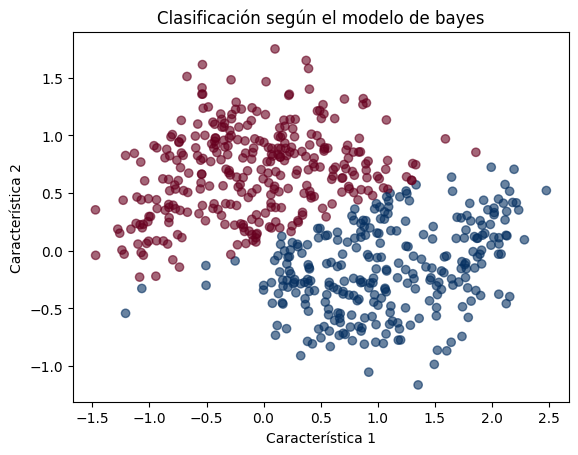

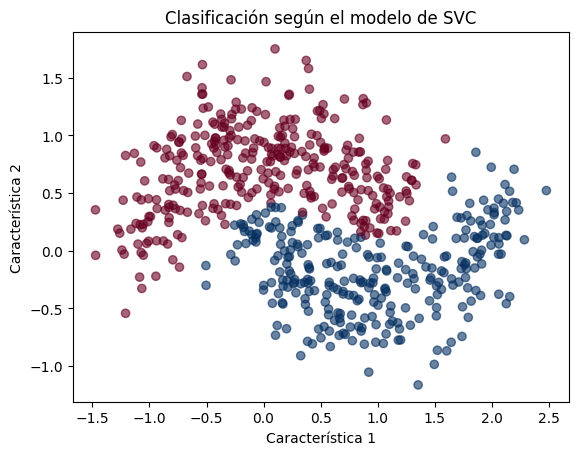

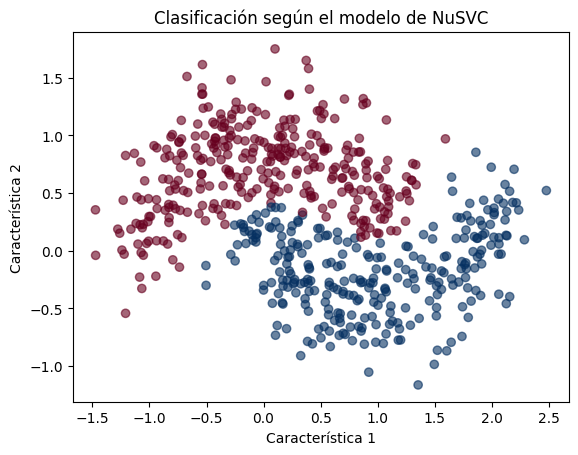

In [51]:
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)
y_pred_bayes = model_bayes.predict(X_val)
accuracy_b = accuracy_score(y_val,y_pred_bayes)

model_svc = SVC(C=0.1, kernel='rbf')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_val)
accuracy_svc = accuracy_score(y_val,y_pred_svc)

model_nusvc = NuSVC(nu=0.3, kernel='rbf')
model_nusvc.fit(X_train, y_train)
y_pred_nu = model_nusvc.predict(X_val)
accuracy_nusvc = accuracy_score(y_val,y_pred_nu)

print(accuracy_b, accuracy_svc, accuracy_nusvc)

plot2(model_bayes,y_pred_bayes,"bayes")
plot2(model_svc,y_pred_svc,"SVC")
plot2(model_nusvc,y_pred_nu,"NuSVC")
#plot_decision_boundary(model_svc, 0.1,accuracy_svc)
#plot_decision_boundary(model_nusvc,0.3,accuracy_nusvc)


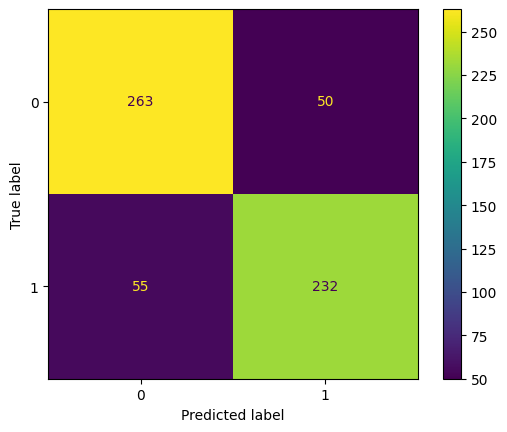

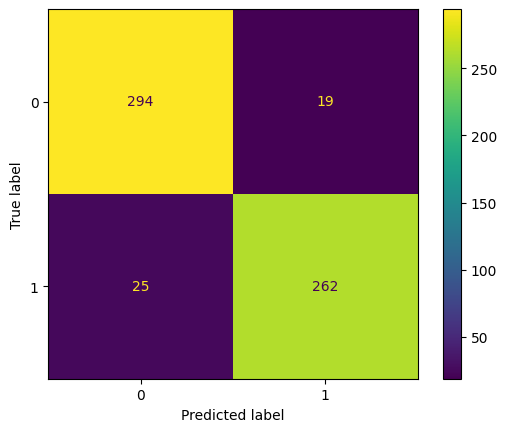

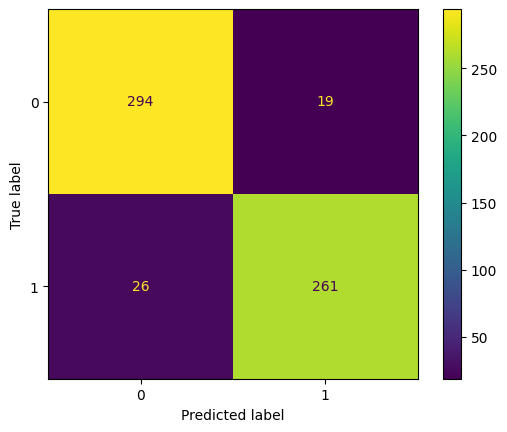

In [49]:
cm_bayes = confusion_matrix(y_true=y_val, y_pred=y_pred_bayes)
cm_svc = confusion_matrix(y_true=y_val, y_pred=y_pred_svc)
cm_nu = confusion_matrix(y_true=y_val, y_pred=y_pred_nu)

cm_display = ConfusionMatrixDisplay(cm_bayes).plot()
cm_display2 = ConfusionMatrixDisplay(cm_svc).plot()
cm_display3 = ConfusionMatrixDisplay(cm_nu).plot()

3) Entrene una máquina de ν=SVM que clasifique los ejemplos de las bases de datos. Explore la influencia de ν
en el resultado de clasificación (bloque B.3) al considerar los siguientes valores: ν = {0,01; 0,1; 0,3; 0,5; 0,7; 0,9}
y de los diferentes kernels: lineal y gaussiano con γ = {0,1; 1; 10; 100}. Encuentre la mejor configuración, es
decir, aquella que maximiza la tasa de aciertos del clasificador en el conjunto de prueba. Si encuentra más
de un valor óptimo, repórtelos todos. ¾Es este problema linealmente separable?, ¾Por qué es necesario en la
práctica usar un clasificador de margen suave? Visualice el hiperplano separador y describa lo que ocurre al
modifocar ν. Tome en consideración la información del ancho del hiperplano 2/∥w∥ y el número de vectores de
soporte. ¾cuál es la relación entre el parámetro ν, la cantidad de vectores de soporte y el error de entrenamiento
y test?.

In [52]:
nu_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
gamma_values = [0.1, 1, 10, 100]
kernel_values = ['rbf','linear']
param_grid = {'nu': nu_values,'kernel':kernel_values, 'gamma': gamma_values}
svm = NuSVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X, y)
grid_search.best_params_  

{'gamma': 10, 'kernel': 'rbf', 'nu': 0.3}

precision(NuSVC): 0.93
Area bajo la curva ROC(NuSVC) (test): 0.962204
Area bajo la curva ROC(NuSVC) (train): 0.978916


Text(0.5, 1.0, 'Vectores de soporte(NuSVC)')

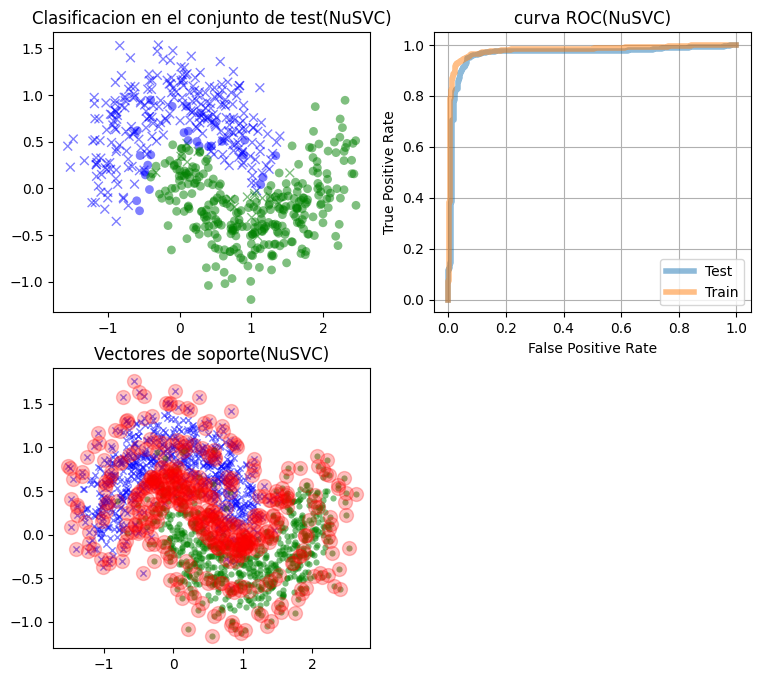

In [18]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(2, 2, 1)
svm = NuSVC(nu=0.3, kernel='rbf', gamma=10, probability=True)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_val)
accuracy_svm = accuracy_score(y_val, svm_pred)
clr=np.asarray(['b','g'])
ax.scatter(X_val[y_val==0, 0], X_val[y_val==0, 1], c=clr[svm_pred[y_val==0]], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')

ax.scatter(X_val[y_val==1, 0], X_val[y_val==1, 1], c=clr[svm_pred[y_val==1]], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificacion en el conjunto de test(NuSVC)')
print("precision(NuSVC): {:.2f}".format(accuracy_svm))

ax = fig.add_subplot(2, 2, 2)
Y_pred = svm.predict_proba(X_val)
fpr, tpr, th = roc_curve(y_val, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC(NuSVC) (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(y_train, svm.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC(NuSVC) (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC(NuSVC)')
plt.grid()

ax = fig.add_subplot(2, 2, 3)
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b', 
           marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g', 
           marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
ax.scatter(X_train[svm.support_, 0], X_train[svm.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
plt.title('Vectores de soporte(NuSVC)')



nu: Un límite superior de la fracción de errores de margen y un límite inferior de la fracción de vectores de soporte. Debe estar en el intervalo (0, 1).

-En este problema no es posible usar un hiperplano lineal dada la naturaleza de los datos,es decir,no existe una recta que pueda separar las clases correctamente, sin embargo, con el uso de kernel=rbf es posible obtener la recta. Esto es posible porque aquel kernel permite mapear los datos a un espacio de características donde es posible encontrar una separación lineal.

-A veces es necesario usar un clasificador de margen suave porque se permite que ciertos puntos esten dentros de los margen a pesar de que esten incorrecto o no. Esta estrategia se usa para poder lograr un equilibrio entre la maximizacion del margen y la minimizacion del error de clasificacion. El uso de margen suave tiene varias ventajas, tales como: mejor tolerancia al ruido, al permitir cierta flexibilidad evita el ajuste excesivo,etc.


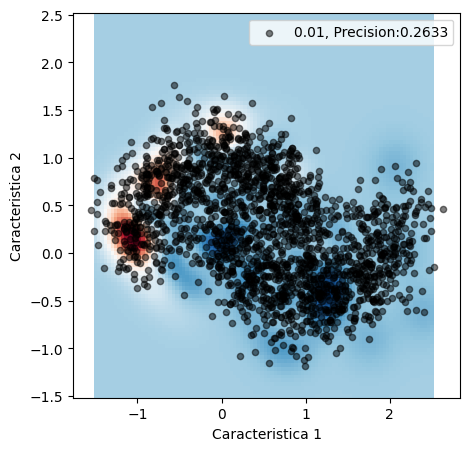

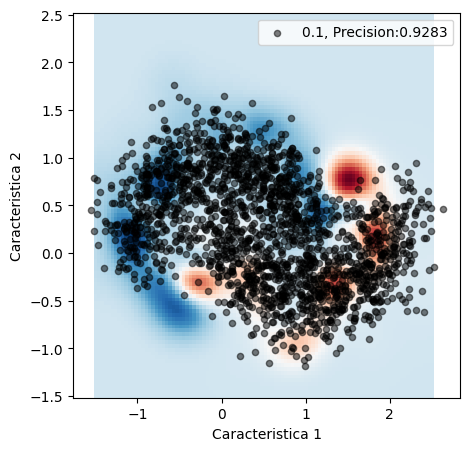

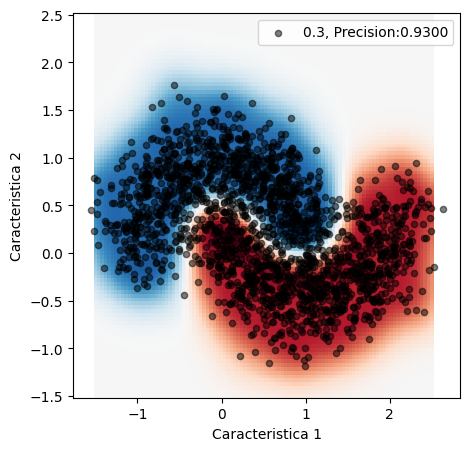

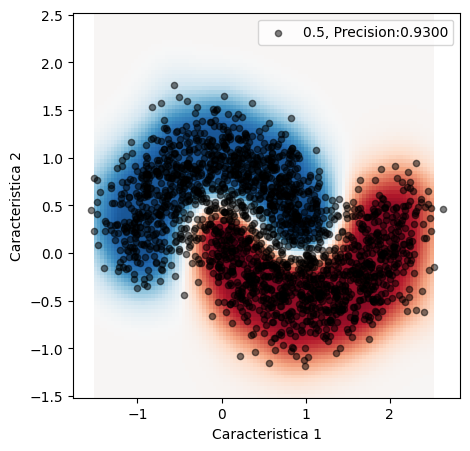

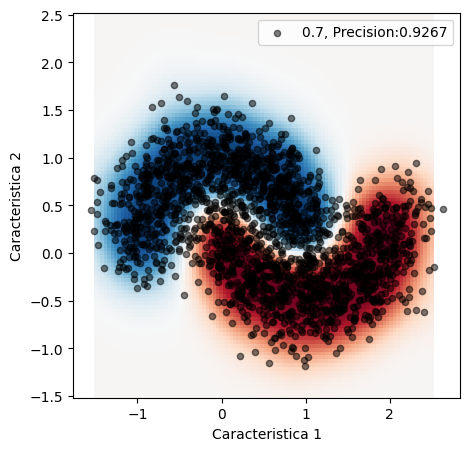

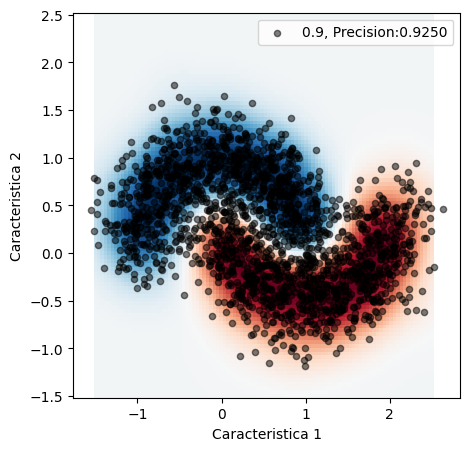

In [9]:
v_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]
#fig, ax = plt.subplots(1,7,figsize=(10,10))
for v in v_values:
  model = NuSVC(nu=v, kernel='rbf', gamma=10)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred)
  plot_decision_boundary(model,v,accuracy)


segun los graficos, se puede ver que los vectores de soporte cambian segun el valor de nu al igual que el margen de error. 

4) Entrene una C-SVM para cada una de las bases de datos (Bloque B.4). Para ello explore el efecto del
parámetro C en la tasa de aciertos del clasificador en el conjunto de prueba para C = {0,01; 0,1; 1; 10; 100; 1000}
y de los diferentes kernels: lineal y gaussiano con γ = {0,1; 1; 10; 100}. Compare sus resultados con P3 y realice
los siguientes análisis:

In [10]:
param_grid = { 'svc__kernel': ['linear', 'rbf'], 
              'svc__gamma': [0.1, 1, 10, 100],
              'svc__C': [0.01, 0.1, 1, 10, 100, 1000]}

md = make_pipeline(StandardScaler(), SVC())
validator = GridSearchCV(md, param_grid, cv=5)
validator.fit(X, y)
validator.best_params_  

{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

Area bajo la curva ROC(SVC) (test): 0.965654
Area bajo la curva ROC(SVC) (train): 0.983638
precision: 0.93


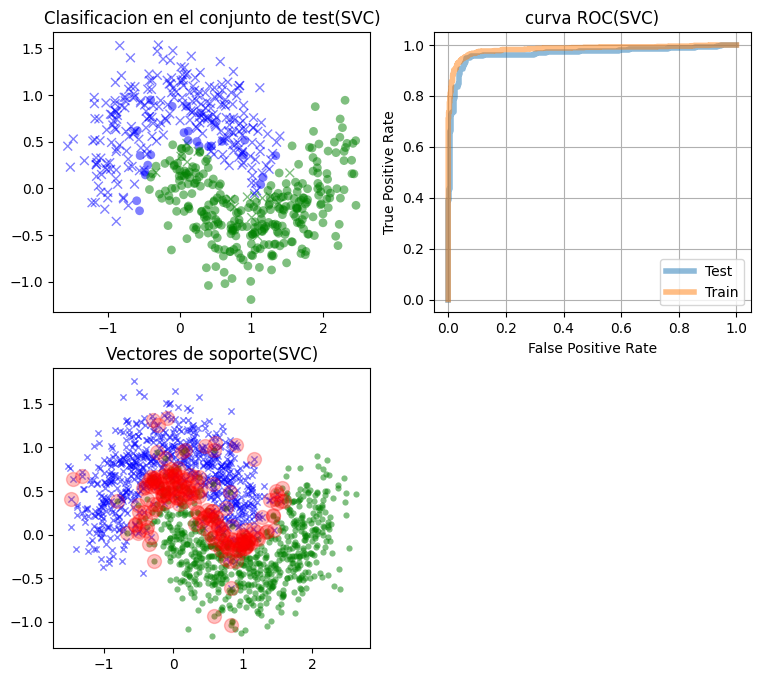

In [13]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(2, 2, 1)
svc = SVC(C=100, kernel='rbf', gamma=1, probability=True)
svc.fit(X_train,y_train)
y_pred_svcc = svc.predict(X_val)
accuracy_svc = accuracy_score(y_val, y_pred_svcc)

clr=np.asarray(['b','g'])
ax.scatter(X_val[y_val==0, 0], X_val[y_val==0, 1], c=clr[y_pred_svcc[y_val==0]], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')

ax.scatter(X_val[y_val==1, 0], X_val[y_val==1, 1], c=clr[y_pred_svcc[y_val==1]], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificacion en el conjunto de test(SVC)')

ax = fig.add_subplot(2, 2, 2)
Y_pred = svc.predict_proba(X_val)
fpr, tpr, th = roc_curve(y_val, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC(SVC) (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(y_train, svc.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC(SVC) (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC(SVC)')
plt.grid()

ax = fig.add_subplot(2, 2, 3)
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b', 
           marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g', 
           marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
ax.scatter(X_train[svc.support_, 0], X_train[svc.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
plt.title('Vectores de soporte(SVC)')
print("precision: {:.2f}".format(accuracy_svc))

4.a) Cuál algoritmo (ν=SVM o C=SVM) entrega el mejor resultado de clasificación en cada base de datos?

Area bajo la curva ROC(v-svm) (test): 0.970805
precision(v-svm):0.93


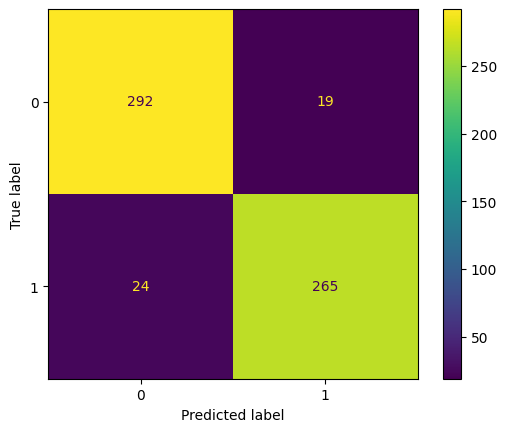

In [58]:
cm = confusion_matrix(y_true=y_val, y_pred=svm_pred)
display = ConfusionMatrixDisplay(cm).plot()
Y_pred = svm.predict_proba(X_val)
fpr, tpr, th = roc_curve(y_val, Y_pred[:, 1])
print("Area bajo la curva ROC(v-svm) (test): %f" %(auc(fpr, tpr)))
print("precision(v-svm):{:.2f}".format(accuracy_svm))
# 292 valores eran positivos y el modelo los predijo todos bien, 265 valores eran negativos y el modelo pudo predecirlos bien
# sin embargo, el modelo se equivoco en 19 predicciones diciendo que son positivas mientras que sus valores reales eran falsas
# por ultimo, el modelo predijo 24 valores negativos cuando sus valores reales eran positivos 

Area bajo la curva ROC(SVC) (test): 0.968435
precision(SVC):0.93


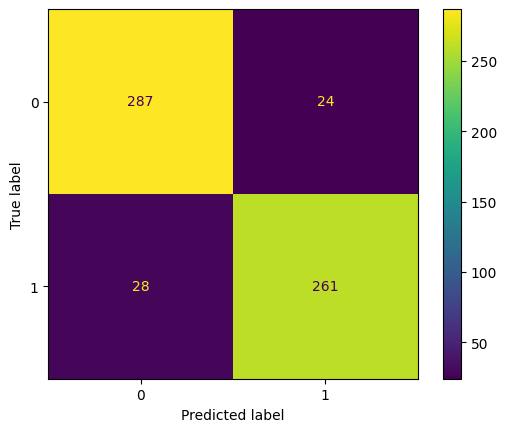

In [59]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred_svc)
display = ConfusionMatrixDisplay(cm).plot()
Y_pred = svc.predict_proba(X_val)
fpr, tpr, th = roc_curve(y_val, Y_pred[:, 1])
print("Area bajo la curva ROC(SVC) (test): %f" %(auc(fpr, tpr)))
print("precision(SVC):{:.2f}".format(accuracy_svc))


4.b) Cuánto varía el resultado de clasificación al utilizar los distintos valores de ν y C?

In [14]:
print("varianza(v-svm): {:.2f}".format(np.var(svm_pred)))
print("varianza(svc): {:.2f}".format(np.var(y_pred_svcc)))

varianza(v-svm): 0.25
varianza(svc): 0.25


4.d)Cuál de los dos algoritmos (ν=SVM o C=SVM) converge más rápido? (Utilice el mismo kernel).

In [15]:
nu_svc = NuSVC(kernel='rbf')
tiempo_nusvc_inicio = time()
nu_svc.fit(X_train, y_train)
tiempo_nusvc_final = time()
tiempo_train_nusvc = tiempo_nusvc_final-tiempo_nusvc_inicio

c_svc = SVC(kernel='rbf')
tiempo_svc_inicio = time()
c_svc.fit(X_train,y_train)
tiempo_svc_final = time()
tiempo_train_svc = tiempo_svc_final - tiempo_svc_inicio
if tiempo_train_nusvc < tiempo_train_svc:
    print("SVC converge más rápido")
elif tiempo_train_svc < tiempo_train_nusvc:
    print("NuSVC converge más rápido")
else:
    print("ambos convergen al mismo ritmo")

NuSVC converge más rápido


4.e)  Cuál es la relación entre el parámetro C de C=SVM y el número de vectores de soporte? (Utilice el
mismo kernel)

In [ ]:
values_c = [0.01, 0.1, 1, 10, 100, 1000]
for c in values_c:
    model = SVC(C=c, kernel='rbf')
    model.fit(X_train,y_train)
    pred = model.predict(X_val)
    accuracy=accuracy_score(y_val,pred)
    plot_decision_boundary(model,c,accuracy)

Cuando existe un valor C bajo permite una mayor flexibilidad en la clasificacion y una mayor tolerancia a los errores.
En caso contrario, penaliza fuertemente los errores de clasificacion y de margen. De esta manera el modelo es mas estrico
y menos tolerante a los errores.

5) Compare los resultados de clasificación para los distintos algoritmos en el bloque B.5 (mejor configuración de
C=SVM y ν=SVM y Bayesiano). Tome nota del área bajo la curva ROC (AUC) de validación y entrenamiento.
Describa lo que observa en términos del hiperplano separador obtenido por los clasificadores, contrastando
adecuadamente con la teoría. ¾En qué casos se logra separar correctamente los conjuntos? ¾En qué casos se
observa sobreajuste? ¾En que casos el modelo utilizado por el clasificador no es adecuado?

In [19]:
Y_pred_b = model_bayes.predict_proba(X_val)
fpr, tpr, th = roc_curve(y_val, Y_pred_b[:, 1])
print("Area bajo la curva ROC(bayes) (test): %f" %(auc(fpr, tpr)))

Y_pred_b2 = model_bayes.predict_proba(X_val)
fpr, tpr, th = roc_curve(y_train, model_bayes.predict_proba(X_train)[:, 1])
print("Area bajo la curva ROC(bayes) (train): %f" %(auc(fpr, tpr)))

Area bajo la curva ROC(bayes) (test): 0.938153
Area bajo la curva ROC(bayes) (train): 0.943126


Area bajo la curva ROC(NuSVC) (test): 0.962204

Area bajo la curva ROC(NuSVC) (train): 0.978916

Area bajo la curva ROC(SVC) (test): 0.965654

Area bajo la curva ROC(SVC) (train): 0.983638


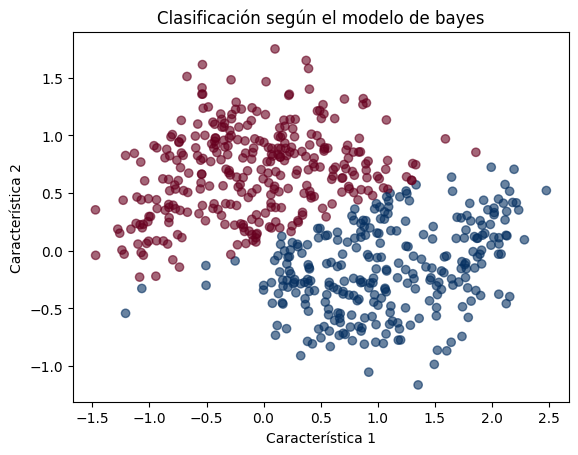

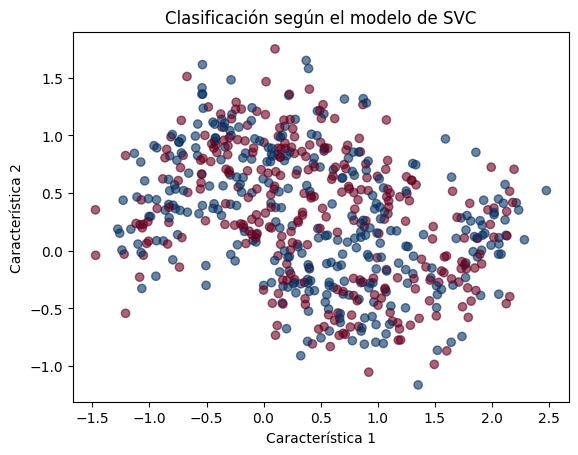

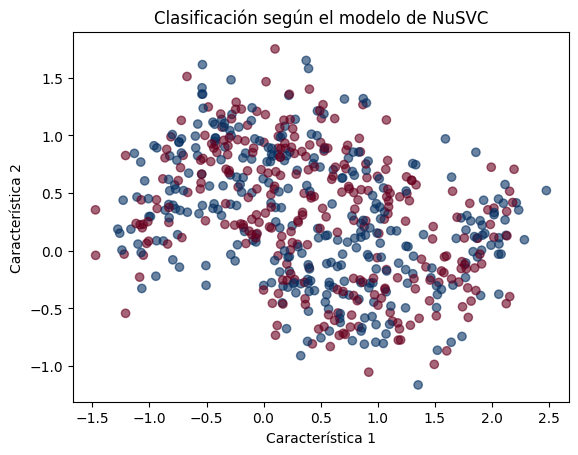

In [53]:
plot2(model_bayes,y_pred_bayes,"bayes")
plot2(model_svc,y_pred_svcc,"SVC")
plot2(model_nusvc,svm_pred,"NuSVC")

precision(v-svm): 0.93
precision(svc): 0.93
precision(bayesiano): 0.82


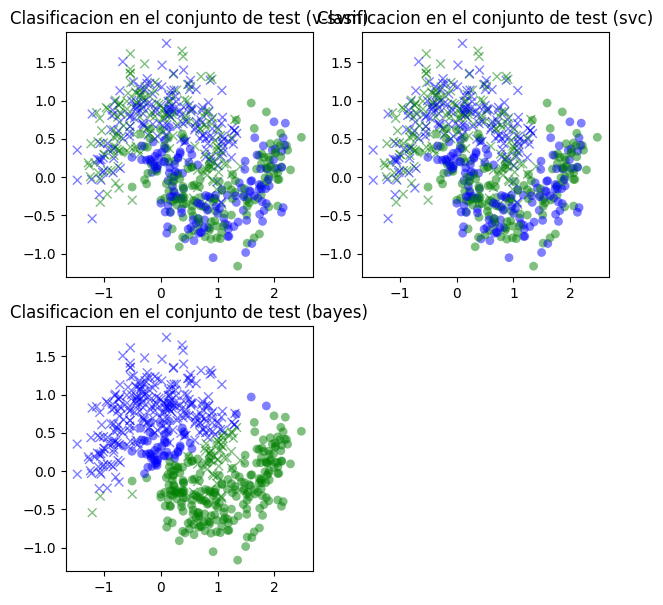

In [50]:


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(2, 2, 1)
clr=np.asarray(['b','g'])
ax.scatter(X_val[y_val==0, 0], X_val[y_val==0, 1], c=clr[svm_pred[y_val==0]], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')

ax.scatter(X_val[y_val==1, 0], X_val[y_val==1, 1], c=clr[svm_pred[y_val==1]], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificacion en el conjunto de test (v-svm)')



ax = fig.add_subplot(2, 2, 2)
clr=np.asarray(['b','g'])
ax.scatter(X_val[y_val==0, 0], X_val[y_val==0, 1], c=clr[y_pred_svcc[y_val==0]], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')

ax.scatter(X_val[y_val==1, 0], X_val[y_val==1, 1], c=clr[y_pred_svcc[y_val==1]], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificacion en el conjunto de test (svc)')


ax = fig.add_subplot(2, 2, 3)
clr=np.asarray(['b','g'])
ax.scatter(X_val[y_val==0, 0], X_val[y_val==0, 1], c=clr[y_pred_bayes[y_val==0]], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=40, label='Clase 1')

ax.scatter(X_val[y_val==1, 0], X_val[y_val==1, 1], c=clr[y_pred_bayes[y_val==1]], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=40, label='Clase 2')
plt.title('Clasificacion en el conjunto de test (bayes)')

print("precision(v-svm): {:.2f}".format(accuracy_svm))
print("precision(svc): {:.2f}".format(accuracy_svc))
print("precision(bayesiano): {:.2f}".format(accuracy_b))


Los graficos nos proporciona cómo cada clasificador está realizando la clasificación y cómo se están separando los conjuntos de datos en función de sus decisiones de clasificación. 
En el caso de la clasificacion de bayes es el modelo menos adecuado para utilizarlo